In [51]:
'''day 18'''
import numpy as np
with open('data/day18.txt', 'r') as day18:
    data = [line.strip().split(" ") for line in day18]
data = [[direction, int(length), color.split('#')[1].split(')')[0]] for direction, length, color in data]

In [26]:
'''test data'''
data = '''R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)'''
data = [line.split(' ') for line in data.split('\n')]
data = [[direction, int(length), color] for direction, length, color in data]

In [52]:
'''part 1'''
width = 0
widths = []
height = 0
heights = []
for instruction in data:
    if instruction[0] == 'R':
        width += instruction[1]
        widths.append(width)
    elif instruction[0] == 'L':
        width -= instruction[1]
        widths.append(width)
    elif instruction[0] == 'U':
        height -= instruction[1]
        heights.append(height)
    elif instruction[0] == 'D':
        height += instruction[1]
        heights.append(height)
width = max(widths)
height = max(heights)
width2 = min(widths)
height2 = min(heights)
print(f'width = {width}, height = {height}')
print(f'width2 = {width2}, height2 = {height2}')

width = 390, height = 86
width2 = -179, height2 = -230


In [54]:
position = [-height2 + 5, -width2 + 5]
field = np.array([[0] * (width - width2 + 10)] * (height - height2 + 10))
border_coords = []

for direction, steps, *_ in data:
    if direction == 'R':
        
        for i in range(steps):
            border_coords.append((position[0], position[1] + i))      
            
        field[position[0]:, position[1]:position[1] + steps] = (
            field[position[0]:, position[1]:position[1] + steps]*-1 + 1)
        position[1] += steps
        
    elif direction == 'L':
        
        for i in range(steps):
            border_coords.append((position[0], position[1] - i))    
            
        field[position[0]+1:, position[1]-steps:position[1]] = (
            field[position[0] + 1:, position[1]-steps:position[1]]*-1 + 1)
        position[1] -= steps
        
    elif direction == 'U':
        
        for i in range(steps):
            border_coords.append((position[0] - i, position[1]))   
            
        field[position[0] - steps:position[0], position[1]] = 1
        position[0] -= steps
        
    elif direction == 'D':
        
        for i in range(steps):
            border_coords.append((position[0] + i, position[1])) 
            
        field[position[0]:position[0] + steps, position[1]] = 1
        position[0] += steps 

    
for x, y in border_coords:
    field[x, y] = 1
    
print(sum(sum(field)))

106459


In [55]:
'''part 2, need to be smarter. use shoelace theorem'''

# create new dataset
expanded = []
letter_map = {'0': 'R',
             '1': 'D',
             '2': 'L',
             '3': 'U'}

for *_, d in data:
    expanded.append([letter_map[d[-1]], int(d[:-1], 16)])
    
def shoelace(verticies):
    S1 = 0
    S2 = 0
    for i in range(len(verticies)-1):
        S1 += verticies[i][0] * verticies[i+1][1]
        S2 += verticies[i][1] * verticies[i+1][0]
    return abs(S1 - S2) // 2

In [56]:
verticies = [(0,0)]
perimiter = 0
for d, l in expanded:
    if d == 'L':
        new_vertex = (verticies[-1][0], verticies[-1][1] - l)
        verticies.append(new_vertex)
    if d == 'R':
        new_vertex = (verticies[-1][0], verticies[-1][1] + l)
        verticies.append(new_vertex)
    if d == 'U':
        new_vertex = (verticies[-1][0] - l, verticies[-1][1])
        verticies.append(new_vertex)
    if d == 'D':
        new_vertex = (verticies[-1][0] + l, verticies[-1][1])
        verticies.append(new_vertex)
    perimiter += l
    
# close the loop
verticies.append(verticies[0])

In [57]:
'''final answer, shoelace area + perimiter/2 + 1 '''
print(shoelace(verticies) + perimiter//2 + 1)

63806916814808


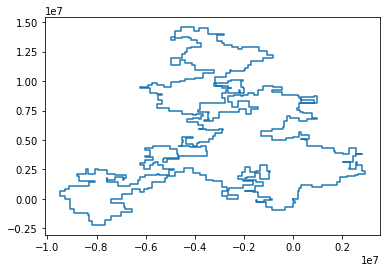

In [58]:
'''visualize polygon'''
import matplotlib.pyplot as plt
x, y = zip(*verticies)
plt.plot(x,y)
plt.show()

In [ ]:
''' for visualization '''

def generate_html_with_red_coords(data, coords):
    html_output = "<html><body><pre>"
    for i, row in enumerate(data):
        for j, char in enumerate(row):
            # Check if the current coordinate is in the list
            if (i, j) in coords:
                # If so, wrap the character in a span with red color
                html_output += f"<span style='color:red;'>{char}</span>"
            else:
                html_output += char
        html_output += "\n"
    html_output += "</pre></body></html>"
    return html_output

array = field.copy()

# Convert numpy array to a 2D list of characters
data_html = array.astype(str).tolist()

# Coordinates to highlight (for example, the diagonal elements)
coords = [(0,0),(-height2 + 5,-width2 + 5)]

# Call the function
html_output = generate_html_with_red_coords(data_html, coords)

output_file_path = 'data/day_18_colored_output_final.html'


# Write the output to an HTML file
with open(output_file_path, 'w') as file:
    file.write(html_output)